In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
#x_test.csv varables
X_train = pd.read_csv("D:\java repository\R5D5-Project-dev\model\ML_Model_Dataset_02\X_train02.csv")
X_test = pd.read_csv("D:\java repository\R5D5-Project-dev\model\ML_Model_Dataset_02\X_test02.csv")
y_train =pd.read_csv("D:\java repository\R5D5-Project-dev\model\ML_Model_Dataset_02\y_train02.csv")
y_test =pd.read_csv("D:\java repository\R5D5-Project-dev\model\ML_Model_Dataset_02\y_test02.csv")
print ("X_train data \n",X_train,"\n")
print ("X_test data \n",X_test,"\n")
print ("y_train data \n",y_train,"\n")
print ("y_test data \n",y_test)

X_train data 
     Close Shot  Mid-Range Shot  Three-Point Shot  Free Throw  Shot IQ  \
0           79              63                25          61       98   
1           93              72                78          80       95   
2           94              88                71          82       85   
3           80              46                47          63       98   
4           69              66                78          83       85   
..         ...             ...               ...         ...      ...   
64          92              91                90          85       84   
65          86              80                40          66       98   
66          65              93                75          93       98   
67          78              60                78          71       60   
68          70              78                72          70       96   

    Offensive Consistency  Speed  Acceleration  Strength  Vertical  ...  \
0                      70     48 

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create an instance of the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: {:.2f}".format(mse))

# Interpret the mean squared error
if mse < 0.01:
    print("The model has very low error and performs well on the test data.")
elif mse < 0.05:
    print("The model has a moderate level of error and performs reasonably well on the test data.")
else:
    print("The model has a relatively high level of error and may not be very accurate on the test data.")

Mean squared error: 0.14
The model has a relatively high level of error and may not be very accurate on the test data.


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create an instance of the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)

#R-squared
r2 = r2_score(y_test, y_pred)

# Calculate the correlation between the actual and predicted values
correlation = np.corrcoef(y_test, y_pred)[0][1]

#print correlation, R-squared, Mean-squeared
print("Correlation: {:.2f}".format(correlation))
print('R-squared: {:.2f}'.format(r2))
print("Mean squared error: {:.2f}".format(mse))

#print correlation

if r2 >= 0.7:
    print("The model explains 70% or more of the variation in the target variable.")
elif r2 >= 0.5:
    print("The model explains between 50% and 70% of the variation in the target variable.")
elif r2 >= 0.3:
    print("The model explains between 30% and 50% of the variation in the target variable.")
else:
    print("The model explains less than 30% of the variation in the target variable.")

# Print the mean squared error and correlation
if correlation >= 0.7:
    print("The model has a strong positive correlation between the actual and predicted values.")
elif correlation <= -0.7:
    print("The model has a strong negative correlation between the actual and predicted values.")
elif abs(correlation) >= 0.3:
    print("The model has a moderate correlation between the actual and predicted values.")
else:
    print("The model has a weak correlation between the actual and predicted values.")

Correlation: nan
R-squared: -0.18
Mean squared error: 0.14
The model explains less than 30% of the variation in the target variable.
The model has a weak correlation between the actual and predicted values.


C:\Users\Dell\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Dell\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Dell\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


<AxesSubplot:>

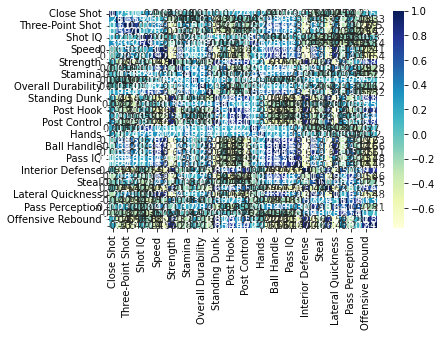

In [23]:
import seaborn as sns

# Create correlation matrix
corr_matrix = X_train.corr()

# Visualize correlation matrix as heatmap
sns.heatmap(corr_matrix, annot=True,cmap="YlGnBu")

<AxesSubplot:>

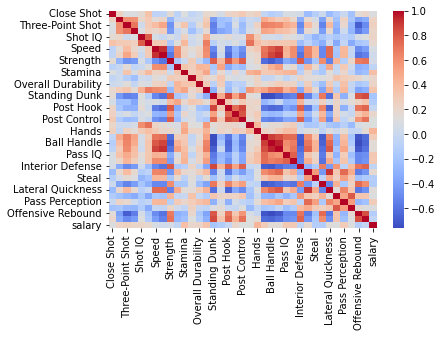

In [24]:
import seaborn as sns

# create a new dataframe with only the features and the target variable
df = X_train.copy()
df['salary'] = y_train

# calculate the correlation matrix
corr_matrix = df.corr()

# plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')

Correlation between 'SALARY' and the top variables:
The variable 'Mid-Range Shot' has a positive correlation with 'salary' of 0.23
The variable 'Three-Point Shot' has a positive correlation with 'salary' of 0.25
The variable 'Free Throw' has a positive correlation with 'salary' of 0.21
The variable 'Shot IQ' has a positive correlation with 'salary' of 0.22
The variable 'Offensive Consistency' has a positive correlation with 'salary' of 0.18
The variable 'salary' has a positive correlation with 'salary' of 1.00


<AxesSubplot:>

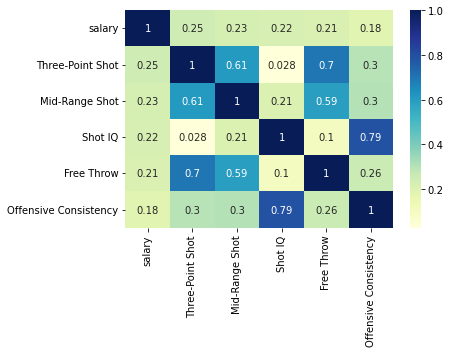

In [30]:
# select the columns of interest
cols = ['Close Shot', 'Mid-Range Shot', 'Three-Point Shot', 'Free Throw', 'Shot IQ', 'Offensive Consistency','salary']

# calculate the correlation matrix
corr = df[cols].corr()

# filter to include only the top 5 correlated features with salary
k = 6
top_k_cols = corr.nlargest(k, 'salary')['salary'].index
top_k_corr = df[top_k_cols].corr()

# print the description of the correlation between 'SALARY' and the top variables
print("Correlation between 'SALARY' and the top variables:")
for var in cols[1:]:
    corr_val = corr['salary'][var]
    if corr_val > 0:
        print(f"The variable '{var}' has a positive correlation with 'salary' of {corr_val:.2f}")
    else:
        print(f"The variable '{var}' has a negative correlation with 'salary' of {corr_val:.2f}")

# plot the heatmap
sns.heatmap(top_k_corr, annot=True, cmap='YlGnBu')

Correlation between 'SALARY' and the top variables:
The variable 'Acceleration' has a positive correlation with 'salary' of 0.03
The variable 'Strength' has a positive correlation with 'salary' of 0.06
The variable 'Vertical' has a negative correlation with 'salary' of -0.05
The variable 'Stamina' has a positive correlation with 'salary' of 0.37
The variable 'Hustle' has a positive correlation with 'salary' of 0.20
The variable 'salary' has a positive correlation with 'salary' of 1.00


<AxesSubplot:>

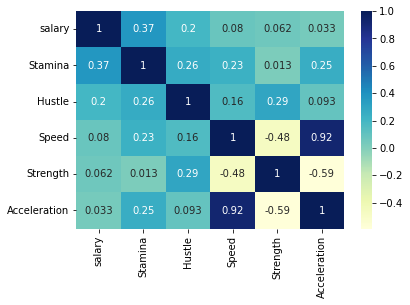

In [33]:
# select the columns of interest
cols = ['Speed', 'Acceleration', 'Strength', 'Vertical', 'Stamina', 'Hustle','salary']

# calculate the correlation matrix
corr = df[cols].corr()

# filter to include only the top 5 correlated features with salary
k = 6
top_k_cols = corr.nlargest(k, 'salary')['salary'].index
top_k_corr = df[top_k_cols].corr()


# print the description of the correlation between 'SALARY' and the top variables
print("Correlation between 'SALARY' and the top variables:")
for var in cols[1:]:
    corr_val = corr['salary'][var]
    if corr_val > 0:
        print(f"The variable '{var}' has a positive correlation with 'salary' of {corr_val:.2f}")
    else:
        print(f"The variable '{var}' has a negative correlation with 'salary' of {corr_val:.2f}")


# plot the heatmap
sns.heatmap(top_k_corr, annot=True, cmap='YlGnBu')

Correlation between 'SALARY' and the top variables:
The variable 'Layup' has a positive correlation with 'salary' of 0.34
The variable 'Standing Dunk' has a negative correlation with 'salary' of -0.19
The variable 'Driving Dunk' has a negative correlation with 'salary' of -0.12
The variable 'Post Hook' has a negative correlation with 'salary' of -0.03
The variable 'Post Fade' has a positive correlation with 'salary' of 0.20
The variable 'salary' has a positive correlation with 'salary' of 1.00


<AxesSubplot:>

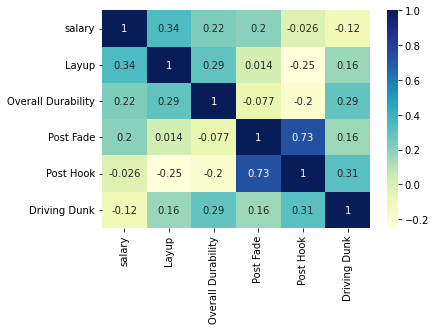

In [34]:
# select the columns of interest
cols = ['Overall Durability', 'Layup', 'Standing Dunk', 'Driving Dunk', 'Post Hook', 'Post Fade','salary']

# calculate the correlation matrix
corr = df[cols].corr()

# filter to include only the top 5 correlated features with salary
k = 6
top_k_cols = corr.nlargest(k, 'salary')['salary'].index
top_k_corr = df[top_k_cols].corr()


# print the description of the correlation between 'SALARY' and the top variables
print("Correlation between 'SALARY' and the top variables:")
for var in cols[1:]:
    corr_val = corr['salary'][var]
    if corr_val > 0:
        print(f"The variable '{var}' has a positive correlation with 'salary' of {corr_val:.2f}")
    else:
        print(f"The variable '{var}' has a negative correlation with 'salary' of {corr_val:.2f}")


# plot the heatmap
sns.heatmap(top_k_corr, annot=True, cmap='YlGnBu')

Correlation between 'SALARY' and the top variables:
The variable 'Draw Foul' has a positive correlation with 'salary' of 0.11
The variable 'Hands' has a positive correlation with 'salary' of 0.43
The variable 'Pass Accuracy' has a positive correlation with 'salary' of 0.29
The variable 'Ball Handle' has a positive correlation with 'salary' of 0.15
The variable 'salary' has a positive correlation with 'salary' of 1.00


<AxesSubplot:>

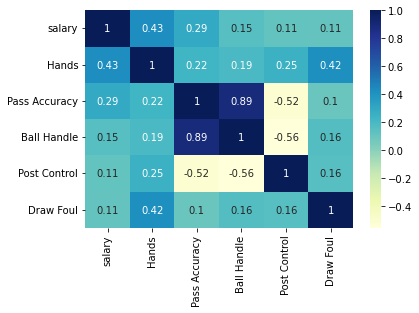

In [35]:
# select the columns of interest
cols = ['Post Control', 'Draw Foul', 'Hands', 'Pass Accuracy', 'Ball Handle','salary']

# calculate the correlation matrix
corr = df[cols].corr()

# filter to include only the top 5 correlated features with salary
k = 6
top_k_cols = corr.nlargest(k, 'salary')['salary'].index
top_k_corr = df[top_k_cols].corr()


# print the description of the correlation between 'SALARY' and the top variables
print("Correlation between 'SALARY' and the top variables:")
for var in cols[1:]:
    corr_val = corr['salary'][var]
    if corr_val > 0:
        print(f"The variable '{var}' has a positive correlation with 'salary' of {corr_val:.2f}")
    else:
        print(f"The variable '{var}' has a negative correlation with 'salary' of {corr_val:.2f}")


# plot the heatmap
sns.heatmap(top_k_corr, annot=True, cmap='YlGnBu')

Correlation between 'SALARY' and the top variables:
The variable 'Pass IQ' has a positive correlation with 'salary' of 0.31
The variable 'Pass Vision' has a positive correlation with 'salary' of 0.31
The variable 'Interior Defense' has a negative correlation with 'salary' of -0.06
The variable 'Perimeter Defense' has a positive correlation with 'salary' of 0.18
The variable 'Steal' has a negative correlation with 'salary' of -0.12
The variable 'salary' has a positive correlation with 'salary' of 1.00


<AxesSubplot:>

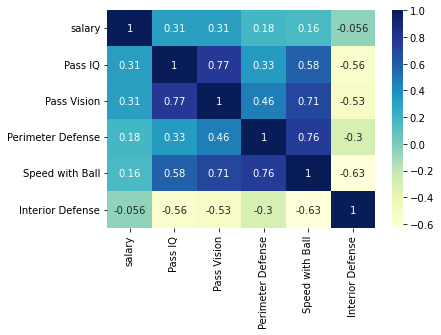

In [36]:
# select the columns of interest
cols = ['Speed with Ball', 'Pass IQ', 'Pass Vision', 'Interior Defense', 'Perimeter Defense', 'Steal','salary']

# calculate the correlation matrix
corr = df[cols].corr()

# filter to include only the top 5 correlated features with salary
k = 6
top_k_cols = corr.nlargest(k, 'salary')['salary'].index
top_k_corr = df[top_k_cols].corr()


# print the description of the correlation between 'SALARY' and the top variables
print("Correlation between 'SALARY' and the top variables:")
for var in cols[1:]:
    corr_val = corr['salary'][var]
    if corr_val > 0:
        print(f"The variable '{var}' has a positive correlation with 'salary' of {corr_val:.2f}")
    else:
        print(f"The variable '{var}' has a negative correlation with 'salary' of {corr_val:.2f}")


# plot the heatmap
sns.heatmap(top_k_corr, annot=True, cmap='YlGnBu')

Correlation between 'SALARY' and the top variables:
The variable 'Lateral Quickness' has a positive correlation with 'salary' of 0.15
The variable 'Help Defense IQ' has a positive correlation with 'salary' of 0.11
The variable 'Pass Perception' has a positive correlation with 'salary' of 0.29
The variable 'Defensive Consistency' has a positive correlation with 'salary' of 0.11
The variable 'Offensive Rebound' has a negative correlation with 'salary' of -0.12
The variable 'Defensive Rebound' has a negative correlation with 'salary' of -0.03
The variable 'salary' has a positive correlation with 'salary' of 1.00


<AxesSubplot:>

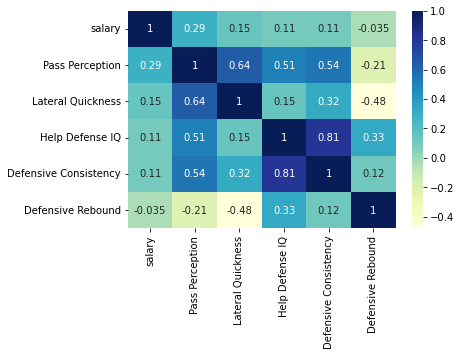

In [37]:
# select the columns of interest
cols = ['Block', 'Lateral Quickness', 'Help Defense IQ', 'Pass Perception', 'Defensive Consistency', 'Offensive Rebound', 'Defensive Rebound','salary']

# calculate the correlation matrix
corr = df[cols].corr()

# filter to include only the top 5 correlated features with salary
k = 6
top_k_cols = corr.nlargest(k, 'salary')['salary'].index
top_k_corr = df[top_k_cols].corr()


# print the description of the correlation between 'SALARY' and the top variables
print("Correlation between 'SALARY' and the top variables:")
for var in cols[1:]:
    corr_val = corr['salary'][var]
    if corr_val > 0:
        print(f"The variable '{var}' has a positive correlation with 'salary' of {corr_val:.2f}")
    else:
        print(f"The variable '{var}' has a negative correlation with 'salary' of {corr_val:.2f}")


# plot the heatmap
sns.heatmap(top_k_corr, annot=True, cmap='YlGnBu')

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold

# Define the features and target
X = X_train[['Close Shot', 'Mid-Range Shot', 'Three-Point Shot', 'Free Throw', 'Shot IQ', 'Offensive Consistency', 'Speed', 'Acceleration', 'Strength', 'Vertical', 'Stamina', 'Hustle', 'Overall Durability', 'Layup', 'Standing Dunk', 'Driving Dunk', 'Post Hook', 'Post Fade', 'Post Control', 'Draw Foul', 'Hands', 'Pass Accuracy', 'Ball Handle', 'Speed with Ball', 'Pass IQ', 'Pass Vision', 'Interior Defense', 'Perimeter Defense', 'Steal', 'Block', 'Lateral Quickness', 'Help Defense IQ', 'Pass Perception', 'Defensive Consistency', 'Offensive Rebound', 'Defensive Rebound']]
y = y_train

# Set up k-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Use k-fold cross validation to select the 6 most important features
k_best = SelectKBest(f_regression, k=6)
k_best.fit(X, y)
X_kbest = k_best.transform(X)
feature_mask = k_best.get_support()

# Print the 6 most important features
print("most effective 6 features from the data set that would helpful when predciting salary")
print(X.columns[feature_mask])

most effective 6 features from the data set that would helpful when predciting salary
Index(['Stamina', 'Layup', 'Hands', 'Pass Accuracy', 'Pass IQ', 'Pass Vision'], dtype='object')


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Define the decision tree model
model = DecisionTreeRegressor(max_depth=3)

#'TWITTER_FAVORITE_COUNT','TWITTER_RETWEET_COUNT', 'TWITTER_FOLLOWER_COUNT_MILLIONS'
#selected most features
features = X_train[['Stamina', 'Layup', 'Hands']]

# Fit the model to the training data
model.fit(features, y_train)

# Plot the decision tree
#plot_tree(model, feature_names=X_train.columns, filled=True)

def plot_tree_with_values(model, features, y_train):
    fig, ax = plt.subplots(figsize=(8,6))
    plot_tree(model, feature_names=features.columns, filled=True, ax=ax)

    for i, node in enumerate(model.tree_.value):
        value = node[0][0]
        if value < 4:
            ax.text(i, value, "{:.2f}".format(value), color="red")
        else:
            ax.text(i, value, "{:.2f}".format(value), color="green")

# Create the plot with a custom resolution and size
plt.figure(figsize=(45,15), dpi=391)
plot_tree(model, filled=True, feature_names=features.columns, fontsize=20)

# Save the plot as a PNG file
plt.savefig('decision_tree.png')

In [25]:
# Split the column names and store them in a list
column_names = list(X_train.columns)
column_names = [column.split('_') for column in column_names]

# Flatten the list of lists to get a 1D list of column names
column_names = [name for sublist in column_names for name in sublist]

# Print the list of column names
print(column_names)

['Close Shot', 'Mid-Range Shot', 'Three-Point Shot', 'Free Throw', 'Shot IQ', 'Offensive Consistency', 'Speed', 'Acceleration', 'Strength', 'Vertical', 'Stamina', 'Hustle', 'Overall Durability', 'Layup', 'Standing Dunk', 'Driving Dunk', 'Post Hook', 'Post Fade', 'Post Control', 'Draw Foul', 'Hands', 'Pass Accuracy', 'Ball Handle', 'Speed with Ball', 'Pass IQ', 'Pass Vision', 'Interior Defense', 'Perimeter Defense', 'Steal', 'Block', 'Lateral Quickness', 'Help Defense IQ', 'Pass Perception', 'Defensive Consistency', 'Offensive Rebound', 'Defensive Rebound']


In [ ]:
'Speed', 'Acceleration', 'Strength', 'Vertical', 'Stamina', 'Hustle',
'Post Control', 'Draw Foul', 'Hands', 'Pass Accuracy', 'Ball Handle',
'Speed with Ball', 'Pass IQ', 'Pass Vision', 'Interior Defense', 'Perimeter Defense', 'Steal'
'Block', 'Lateral Quickness', 'Help Defense IQ', 'Pass Perception', 'Defensive Consistency', 'Offensive Rebound', 'Defensive Rebound'